# Analyzing Unstructured(text) Data

In this practical, you'll learn how to analyze structured data using data science methodology starting from problem formulation to storytelling with data.

# Objectives

At the end of this practical, you will be able to:
* Efficiently formulate data science problem for text data
* Annotate text data
* Clean text data using regular expressions
* Represent text as a Bag of Words(BOW)
* Implement logistic regression model using Python
* Evalute logistic regression model using different metrics
* Analyze the model to extract important features (words)

<h1>Table of Contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#1.-Problem-Formulation">Problem Formulation</a></li>
    <li><a href="#2.-Data-Collection">Data Collection</a></li>
    <li><a href="#3.-Data-Preparation">Data Preparation</a></li>
    <li><a href="#4.-Data-Analysis">Data Analysis</a></li>
    <li><a href="#5.-Storytelling-with-Data">Storytelling with Data</a></li>    
    
</ol>

</div>



# Data Science Process

![Data Science Process Infographic](data_science_process_image.png)
<br>
<i><center><font size=2> Figure 1. Data Science Process Infographic </font></center></i>

In this notebook, you'll follow the above data science process to analyze unstructured data.

|Exercise|
|:---:|
|What is unstructured data? Give an example of unstructured data.|


In [1]:
# write your answer here


# 1. Problem Formulation 

Problem formulation is a first step of data science process. A variety of problems can be formulated with text data. You learnt about the following major applications involving text and speech data in the lecture.
* Automatic Speech Recognition (ASR)
* Text to Speech (TTS)
* Optical Character Recognition (OCR)
* Machine Translation
* Natural Language Generation e.g., Chatbots
* Information Retrieval (IR)
* Text Classification e.g., Spam vs Not Spam

For this practical, you'll work on the following scenario. After reading the scenario, answer the exercise questions.

State government is planning for COVID-19 vaccine promotions. You have been consulted to analyze people's tweets related to COVID-19 vaccine. Particularly, you'll be developing a model that will label any tweet as either positive or negative about the vaccine. This will help the government effectively plan vaccine promotions. Now answer the following questions:

|Exercise|
|:---:|
|1. What kind of problem is this? (e.g. Information Retrieval, Machine Translation, etc.)|
|2. Who are my stakeholders?|
|3. What value does this bring to stakeholders?|

In [1]:
# write your answer here



# 2. Data Collection

Once the problem is defined, next step is to collect data for analysis. Twitter allows you to collect tweets through its API. Though, for this practical you will use already collected data. However, if you are interested in learning more about how to use the API to extract tweets, <a href="https://towardsdatascience.com/how-to-access-data-from-the-twitter-api-using-tweepy-python-e2d9e4d54978">this article</a> will be useful.

## 2.1 Load Data

In [1]:
# import pandas library using alias pd
import pandas as pd
# pd.set_option('precision', 2)

# load the data
labelled_tweets = pd.read_csv("labelled_data.csv")

# Display first five rows of the data
labelled_tweets.head()

,Tweet,Sentiment
0,"@VicGovDH @MartinFoleyMP Always remember, you ...",Neg
1,https://t.co/VvU0EqfTek Rachel Clun : big ban...,Pos
2,Fears staff shortages could be the next pinch-...,Neg
3,When Scomo said Australia is at the front of t...,Neg
4,"@THE_Russell So where is it Morrison, it the e...",Pos


**Column Descriptions**

1. **Tweet** : The content of the tweet
2. **Sentiment** :  Sentiment of the tweet. It can be either Pos(positive)  or Neg(negative).

# 3. Data Preparation

## 3.1 Data Annotation

Though for this practical, the tweet sentiments labels are provided to you, but that's not always the case. You need to manually find sentiment of tweets. To practise data annotation skills, you'll work on the following unlabelled data. Particularly, you will manually annotate the data.

In [2]:
# load unlabelled data
unlabelled_tweets = pd.read_csv("unlabelled_data.csv")

# Display first five rows of the data
unlabelled_tweets.head()

,Tweet,Sentiment
0,Fed up with ableist nonsense about vaccination...,Add a label
1,@ketaminh The right answer depends on if you a...,Add a label
2,@fundaygunday @WhiteboardKatie @jimmy_dore Wag...,Add a label
3,SloMo finally making vaccines mandatory for ag...,Add a label
4,@abcnews Double vax passports until 85 to 90% ...,Add a label


<b>Instructions for annotating the data

1. Download the file 'unlabelled_data.csv'
2. Open it in Microsoft Excel or other Spreadsheet software
3. Read the tweet content and identify if the tweet is positive/negative about vaccination
4. Replace 'Add a label' with the sentiment 'Pos' or 'Neg'
5. After annotating all the tweets, save the file as 'annotated_data.csv' and upload to the same directory as 'unlabelled_data.csv'
6. Compare your annotations with the actual labels from the file (unlabelled_data_answers.csv)

## 3.2 Data Cleaning

Let's explore a couple of tweets.

In [3]:
labelled_tweets.loc[6, "Tweet"]

"Lol. My choice was to get a vaccine to help protect my health and the community, now I get freedoms that Brandon doesn't and he's having a cry now that he realises his choices have consequences ðŸ˜‚ðŸ˜‚ðŸ˜‚ #FreeDumb #DansLockoutFail #Covid19Vic https://t.co/HuEPQRYheO"

In [4]:
labelled_tweets.loc[7, "Tweet"]

'National cabinet prepares to meet amid growing tensions over COVID-19 vaccine rollout https://t.co/V2PcHp7w8P via @SBSNews'

It can be observed that a tweet can contain hyperlinks, hashtags, @mentions and also some weired characters. However, they are not useful as we are only interested in the text. So, let's remove them to keep only text.

You'll use regular expressions (regex) to clean the tweets. Read more about <a href="https://www.youtube.com/watch?v=sHw5hLYFaIw&t=264s">regex</a> here. <b>In the following function, the regular expressions to remove hashtags and @mentions are missing. You need to write appropriate code to remove hashtags and @mentions using regular expressions.</b>

In [5]:
import re

# define a function to clean a tweet
def clean_tweet(tweet):
    
    # remove hyper-links
    tweet = re.sub(r"https:[\S]+", " ", tweet)
    
    # remove new line characters (\n)
    tweet = re.sub(r"\\n"," ", tweet)
    
    # remove any weired characters
    tweet = re.sub(r"[^A-Za-z*'-]+", " ", tweet)
    
    # remove hash-tags
    # write appropriate regular expression
    
    # remove @-mentions
    # write appropriate regular expression
    
    # convert tweet text to lowercase
    tweet = tweet.lower().strip()
    
    return tweet

Once you have written code to remove hashtags and @mentions, apply the function to clean the tweets.

In [6]:
labelled_tweets["Tweet"] = labelled_tweets["Tweet"].apply(clean_tweet)

In [7]:
# verify that the function worked as intended
labelled_tweets.loc[6, "Tweet"]

"lol my choice was to get a vaccine to help protect my health and the community now i get freedoms that brandon doesn't and he's having a cry now that he realises his choices have consequences freedumb danslockoutfail covid vic"

# 4. Data Analysis

In this step, you'll fit a logistic regression model to predict whether a tweet has positive or negative sentiment. But before that, you need to split the data into train and test set. Train set data will be used to develop a text classification model and test set data will be used to evaluate the model.

In [8]:
# comment the following line if you want to use your cleaned version
labelled_tweets = pd.read_csv("cleaned_tweets.csv")

## 4.1 Train-Test Split

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split

# define random state to make random processes reproducible
random_state = np.random.RandomState(0)

In [10]:
# Define X(features) and y(target)
X = labelled_tweets["Tweet"]
y = labelled_tweets["Sentiment"]

# split the data into train-test split where 30% of data will be used as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=random_state)

## 4.2 Representing Text as Bag of Words (BOW)

Models like Logistic Regression can not directly handle text data. They only accept numeric data. And hence, text should be converted to a numeric vector before inputting to the model. Bag of Words (BOW) is one of the most commonly used model to represent text as numeric vector.

![BOW](BOW.png)
<br>
<i><center><font size=2> Figure 2. Representing text as Bag of Words (BOW) (source: <a href="https://www.google.com/url?sa=i&url=https%3A%2F%2Fmedium.com%2Fswlh%2Fspam-filtering-using-bag-of-words-aac778e1ee0b&psig=AOvVaw0o71VZ5v7TgtT34Hm90QQ7&ust=1650855196530000&source=images&cd=vfe&ved=0CAwQjRxqFwoTCJiI64PZq_cCFQAAAAAdAAAAABAD">Medium</a>) </font></center></i>

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
# !pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/uqpvelra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The tweet can contain certain words such as 'is', 'the', 'are', etc. which are not useful for identifying sentiments. Such words are called stopwords. Also, in this text words like 'vaccine', 'vaccination', etc. will be common and should be removed.  Let's remove such words while performing BOW.

In [12]:
# define stop words and also add custom stop words such as 'vaccine'
stop_words = stopwords.words('english')
stop_words.extend(['vaccine', 'vaccination', 'covid', 'vaccinated', 'vaccines', 'vax'])

In [13]:
# define CountVectorizer object
# min_df=0.01 means words that belong to only 1% of the all tweets will be excluded in the BOW
vectorizer = CountVectorizer(stop_words=stopwords.words('english'), min_df=0.01)
# vectorizer = CountVectorizer(stop_words=stopwords.words('english'))

# fit the vectorizer object to train data
vectorizer.fit(X_train)

# get the BOW for train data
X_train_BOW = vectorizer.transform(X_train)


In [14]:
# visualize BOW
training_data_BOW = pd.DataFrame(data=X_train_BOW.toarray(), columns=vectorizer.get_feature_names()).T

# display the last few rows of the dataframe
training_data_BOW.head(5)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,480,481,482,483,484,485,486,487,488,489
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
adverse,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
afraid,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
aged,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ago,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In the above dataframe, the row labels are list of words extracted from the tweets and column labels are tweet numbers for the training data. The value inside the dataframe indicates number of occurrences of a particular word in the given tweet. For example, the word 'afraid' occurs twice in the tweet 484.

## 4.3 Visualize Text Using Word Cloud

In [15]:
# !pip install wordcloud
from wordcloud import WordCloud
from matplotlib import pyplot as plt

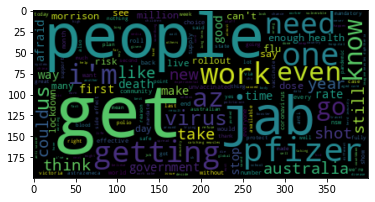

In [17]:
text = " ".join(X_train)
word_cloud = WordCloud(stopwords=set(stop_words)).generate(text)
plt.imshow(word_cloud, interpolation='bilinear');

Some words such as 'get', 'people', 'virus', 'pfizer', 'jab', 'work', etc. are frequently occuring in the tweets from train data set.

## 4.3 Baseline Model

Baseline model is the simplest model that we want to beat using other model such as Logistic Regression. In this case, we can consider the most frequently occuring sentiment in the train data and assign it to the test data. 

In [18]:
# identify most frequently occurring sentiment in the train data
y_train.value_counts()

Pos    252
Neg    238
Name: Sentiment, dtype: int64

It can be observed that 'Pos' is frequently occuring than 'Neg'. So you'll assign 'Pos' to test data as well.

In [19]:
# assign 'Pos' to test data
y_test_baseline_predictions = pd.Series(['Pos']*len(y_test))

## 4.4 Logistic Regression Model

The baseline model naively assumes that sentiment of test data is also 'Pos' as it is the most frequenly occuring sentiment. However, it might not be always true. Let's hypothesize that logistic regression model can overcome this baseline model.

Logistic regression belongs to a family of linear models that can be used to predict categorical outcome such as positive or negative sentiment, spam or not spam email, etc. In our case, it will take the bag of words as input and based on that it will predict whether the tweet has 'Pos' or 'Neg' sentiment.

![BOW](logistic_regression.png)
<br>
<i><center><font size=2> Figure 3. Logistic Regression Model (source: <a href="https://www.google.com/url?sa=i&url=https%3A%2F%2Fprwatech.in%2Fblog%2Ftag%2Flogistic-regression-in-machine-learning%2F&psig=AOvVaw1U5NdjesCqcA3nfg0IyoI0&ust=1650860218476000&source=images&cd=vfe&ved=0CAwQjRxqFwoTCLio2Ozrq_cCFQAAAAAdAAAAABAK">Prwatech</a>) </font></center></i>

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
# define lgositic regression model object
log_reg = LogisticRegression(random_state=random_state)

# fit the model to training data
log_reg.fit(X_train_BOW, y_train)

LogisticRegression(random_state=RandomState(MT19937) at 0x7FFFBBFA0840)

In [22]:
# make prediction on test data

# create BOW for test data
X_test_BOW = vectorizer.transform(X_test)

# predict using log_reg object
y_test_log_reg_predictions = log_reg.predict(X_test_BOW)

# view the predictions
y_test_log_reg_predictions

array(['Pos', 'Pos', 'Neg', 'Neg', 'Neg', 'Pos', 'Pos', 'Neg', 'Pos',
       'Pos', 'Neg', 'Pos', 'Neg', 'Pos', 'Neg', 'Pos', 'Neg', 'Pos',
       'Pos', 'Pos', 'Neg', 'Neg', 'Pos', 'Pos', 'Pos', 'Neg', 'Pos',
       'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Pos', 'Pos', 'Neg', 'Pos',
       'Pos', 'Neg', 'Pos', 'Pos', 'Neg', 'Pos', 'Pos', 'Neg', 'Pos',
       'Neg', 'Neg', 'Pos', 'Neg', 'Pos', 'Neg', 'Pos', 'Pos', 'Pos',
       'Neg', 'Neg', 'Pos', 'Pos', 'Neg', 'Pos', 'Neg', 'Pos', 'Pos',
       'Pos', 'Neg', 'Pos', 'Pos', 'Neg', 'Pos', 'Pos', 'Pos', 'Pos',
       'Pos', 'Neg', 'Neg', 'Pos', 'Pos', 'Pos', 'Neg', 'Neg', 'Neg',
       'Neg', 'Neg', 'Neg', 'Pos', 'Neg', 'Pos', 'Pos', 'Neg', 'Pos',
       'Pos', 'Neg', 'Neg', 'Pos', 'Neg', 'Pos', 'Neg', 'Pos', 'Pos',
       'Pos', 'Neg', 'Neg', 'Neg', 'Pos', 'Neg', 'Neg', 'Pos', 'Pos',
       'Pos', 'Pos', 'Neg', 'Pos', 'Neg', 'Neg', 'Neg', 'Pos', 'Pos',
       'Neg', 'Pos', 'Neg', 'Neg', 'Pos', 'Pos', 'Neg', 'Pos', 'Neg',
       'Neg', 'Neg',

Though the predictions might not be accurate. You'll learn to evalute the model in the next step.

# 5. Storytelling with Data

In this part, you'll learn to evalute logistic regression model using different metrics. Also, you'll identify important words marked by the model.

## 5.1 Model Evaluation

Let's evaluate the model using the metric 'accuracy'.

In [23]:
from sklearn.metrics import accuracy_score

### 5.1.1. Baseline Model Evaluation

In [24]:
accuracy_score(y_test, y_test_baseline_predictions)

0.4666666666666667

The model naively assumed all sentiment as 'Pos', which is not always the case. The model's accuracy is ~47%.

### 5.1.2 Logistic Regression Model Evaluation

#### 1. Using hold-out set

In [25]:
accuracy_score(y_test, y_test_log_reg_predictions)

0.6571428571428571

The model's accuracy on hold-out (test) set is ~66%.

#### 2. Using cross-validation

In [26]:
from sklearn.model_selection import cross_val_score

# find accuracy of model using 3-fold cross validation
cross_val_score(LogisticRegression(), X_train_BOW, y_train, cv=5).mean()

0.6387755102040816

The model's accuracy using 5-fold cross-validation set is also ~64%.

Also, accuracy calculated using cross-validation is more reliable than accuracy on hold-out set. This is because cross-validation gives your model the opportunity to train on multiple train-test splits. This gives you a better indication of how well your model will perform on unseen data. Hold-out, on the other hand, is dependent on just one train-test split.  Logistic regression model is proved to be better than the baseline model.

|Exercise|
|:---:|
|However, accuracy is not always reliable metric. Give an example where accuracy score can be misleading in evaluating a model.|


In [27]:
# write your answer here



<b>3. Confusion matrix

Using confusion matrix, many useful metrics can be derieved. You'll now plot confusion matrix.

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

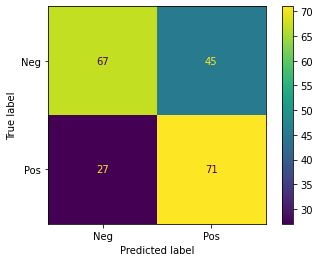

In [28]:
cm = confusion_matrix(y_test, y_test_log_reg_predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
display.plot();

Let's interpret the confusion matrix and derieve some useful metrics. Here,
* Model correctly identified 67 negative sentiment tweets as negative. (True Negative - TN)
* Model correctly identified 71 positive sentiment tweets as positive. (True Positive - TP)
* Model incorrectly identified 27 positive sentiment tweets as negative. (False Negative - FN)
* Model incorrectly identified 45 negative sentiment tweets as positive. (False Positive - FP)

* Precision = TP/(TP+FP) = 71/(71+45) = 0.6120 <br>
It means out of 100 times when model predicted positive sentiment, it was only 61 times actually positive.

|Exercise|
|:---:|
|Calculate `Recall` metric using the confusion matrix and interpret the value. Hint : `Recall = TP/(TP+FN)`|


In [30]:
# write your answer here



Ideally, we want to balance the precision and recall scores for a model. F1-score takes into account both the precision and recall. Let's calculate F1 score


In [29]:
from sklearn.metrics import f1_score

f1_score(y_test, y_test_log_reg_predictions, pos_label='Pos')

0.6635514018691588

F1-score shows trade-off between precision and recall. The higher F1-score, better the model is. It can take max value 1 and min value 0. Using F1-score, you can compare performance of various classification models.

## 5.2 Identifying important words for predictions

Following function will identify top words which were marked important by model in making predictions.

In [30]:
# function adapted from https://aneesha.medium.com/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
def plot_coefficients(classifier, feature_names, top_features=10):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 2 * top_features), feature_names[top_coefficients], rotation=90, ha='right')
    plt.xlabel("Important Words")
    plt.ylabel("Model Coefficient")
    plt.title("Important words with their model coefficient")
    plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


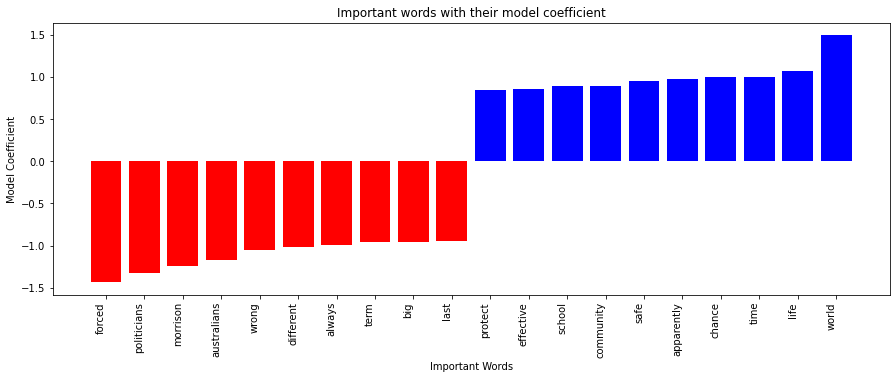

In [31]:
plot_coefficients(log_reg, vectorizer.get_feature_names())

The plot shows 20 words which played important role in making predictions. The red bars show top 10 words with negative model coefficient and blue bars show top 10 words with positive model coefficient values.